In [164]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_by_feature_extraction(df, models, metric='AUC', show_eval=True, show_train=True):
    df['Feature_extraction_method'] = df['search_term'].apply(lambda x: x.split('_', 1)[1])
    df["Feature_extraction_method"] = df["Feature_extraction_method"].apply(
    lambda x: "_".join(x.split("_")[:-2]))
    # Display unique values to verify the result
    df["Feature_extraction_method"].unique()
    best_model_train_score = 0
    best_model_eval_score = 0
    best_train_search_term = ""
    best_eval_search_term = ""
    feature_extraction_methods = df['Feature_extraction_method'].unique()
    
    # Define a color palette for models
    color_palette = sns.color_palette('tab10', len(models))
    model_colors = dict(zip(models, color_palette))

    # Generate plots for each feature extraction method with matching colors for solid and dotted lines
    for method in feature_extraction_methods:
        
        # Filter data for the current feature extraction method
        method_df = df[df['Feature_extraction_method'] == method]
        
        # Group by model type, percentage of data, and eval/train, then calculate mean metrics
        grouped_method_df = method_df.groupby(
            ["percentage_of_data", "model_type", "eval_or_train", "search_term"]
        )[[metric]].mean().reset_index()

        # Create the plot
        plt.figure(figsize=(12, 6))
        grouped_method_df_train = grouped_method_df[grouped_method_df["eval_or_train"] == "train"]
        grouped_method_df_eval = grouped_method_df[grouped_method_df["eval_or_train"] == "eval"]

        # Plot lines for each model type
        for model in models:
            if model == "Random":
                continue

            train_data = grouped_method_df_train[grouped_method_df_train['model_type'] == model]
            eval_data = grouped_method_df_eval[grouped_method_df_eval['model_type'] == model]

            # Use the same color for both train and eval lines
            color = model_colors[model]

            # Plot train data (solid line)
            if show_train:
                plt.plot(train_data['percentage_of_data'], train_data[metric], label=f'{model} (train)', linestyle='-', color=color)

            # Plot eval data (dotted line) if enabled
            if show_eval:
                plt.plot(eval_data['percentage_of_data'], eval_data[metric], label=f'{model} (eval)', linestyle='--', color=color)
            
            # Update best model scores
            if train_data[metric].max() > best_model_train_score:
                best_model_train_score = train_data[metric].max()
                best_train_search_term = train_data[train_data[metric] == best_model_train_score].iloc[0]['search_term']
            if eval_data[metric].max() > best_model_eval_score:
                best_model_eval_score = eval_data[metric].max()
                best_eval_search_term = eval_data[eval_data[metric] == best_model_eval_score].iloc[0]['search_term']

        # Customize the plot
        plt.xlabel('Percentage of Data')
        plt.ylabel(f'Mean {metric.replace("_", " ")}')
        plt.title(f'{metric.replace("_", " ")} vs Percentage of Data by Model - Feature Extraction: {method}')
        plt.legend(loc='best')
        plt.grid(True)

        # Display the plot
        plt.show()

    print(f"Best model train score: {best_model_train_score} with search term: {best_train_search_term}")
    print(f"Best model eval score: {best_model_eval_score} with search term: {best_eval_search_term}")


In [172]:
path = "00_results/wm/"
csvs_deconfounded = [path + f for f in os.listdir(path) if f.endswith('.csv')]
df = pd.concat([pd.read_csv(file) for file in csvs_deconfounded])

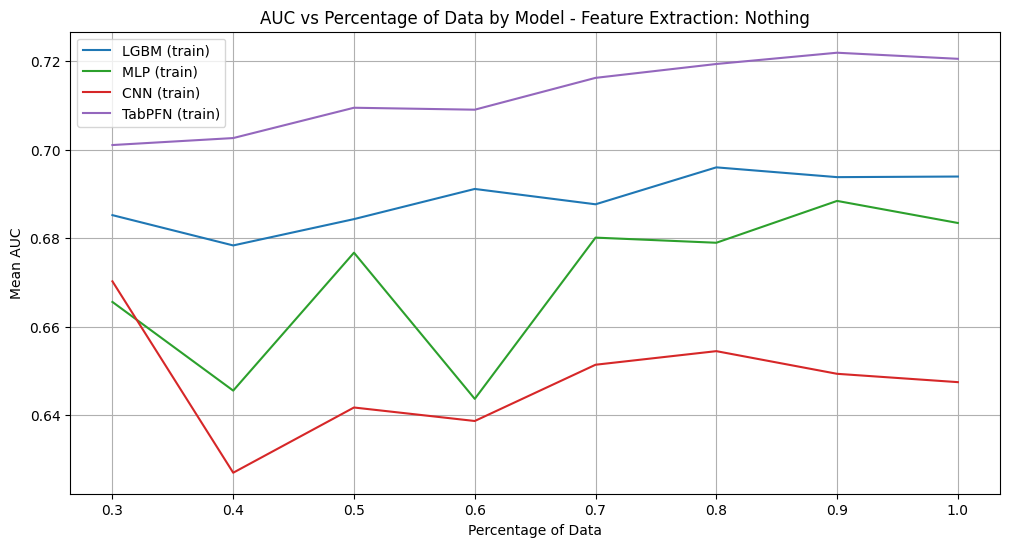

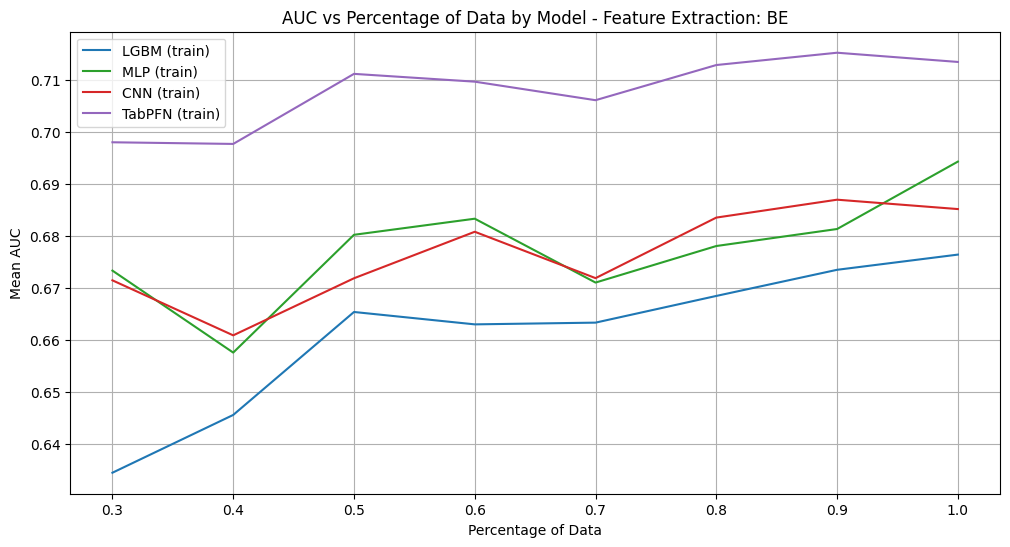

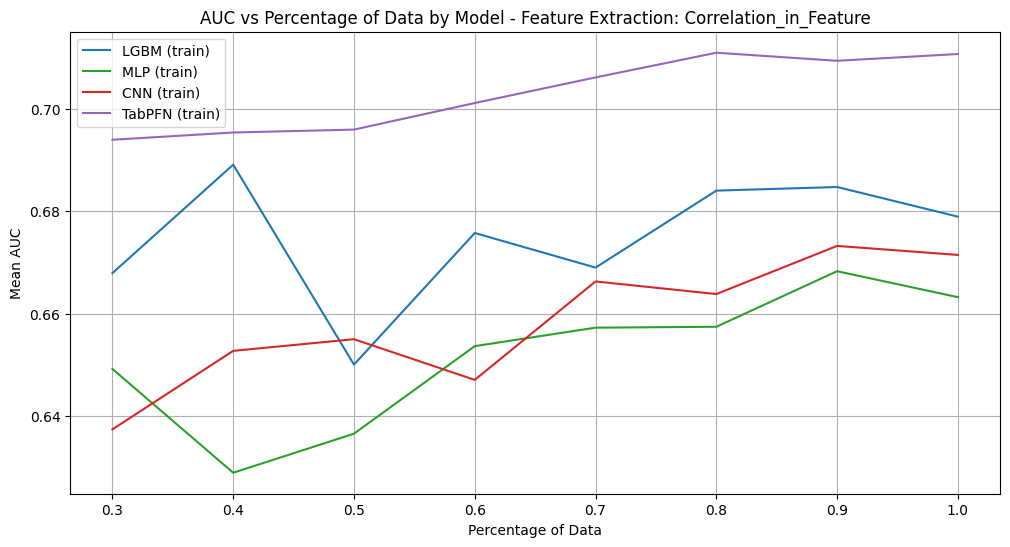

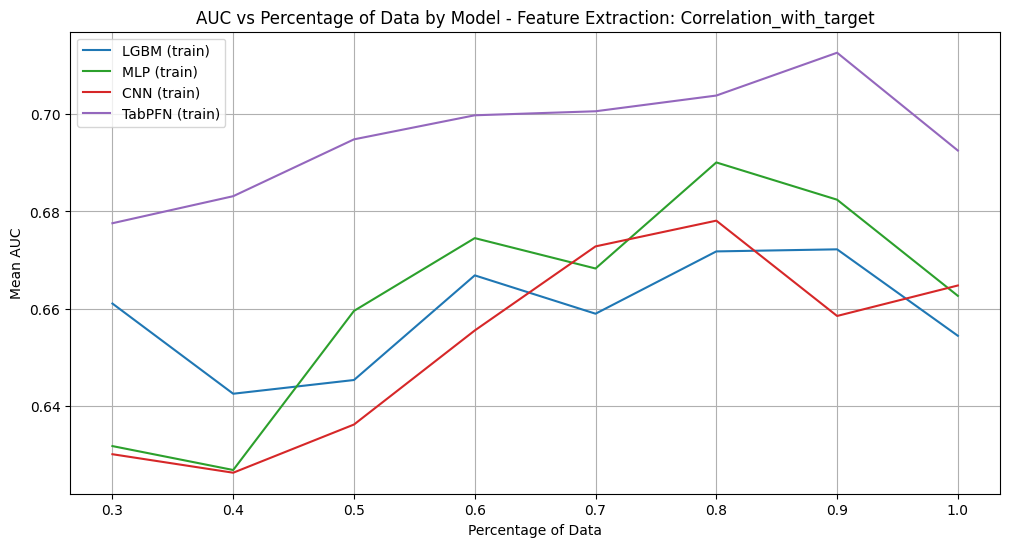

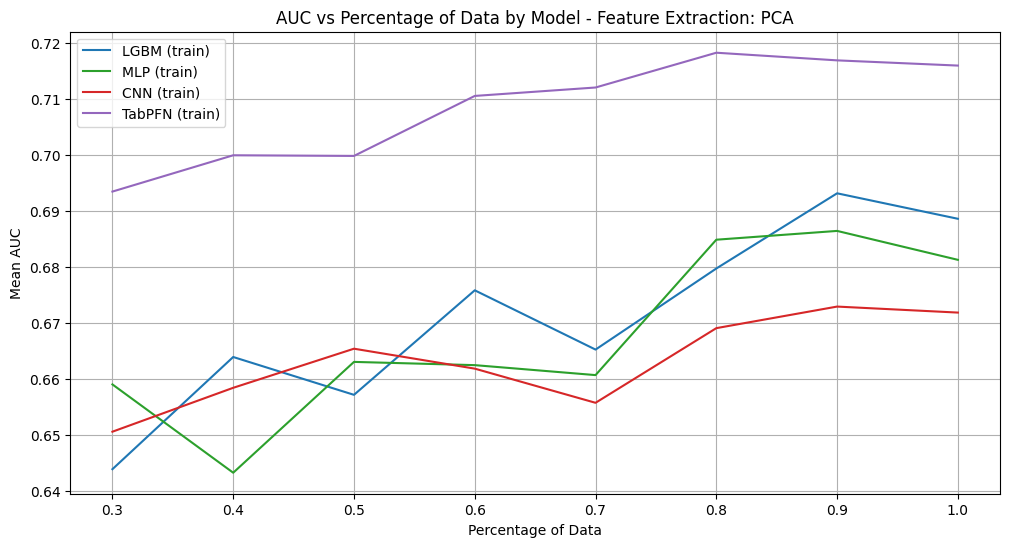

Best model train score: 0.7218843245533983 with search term: 0.9_Nothing_TabPFN_train
Best model eval score: 0.7651894374282435 with search term: 0.3_Correlation_in_Feature_TabPFN_eval


In [173]:
models = df['model_type'].unique()
plot_metric_by_feature_extraction(df, models, metric='AUC', show_eval=False)

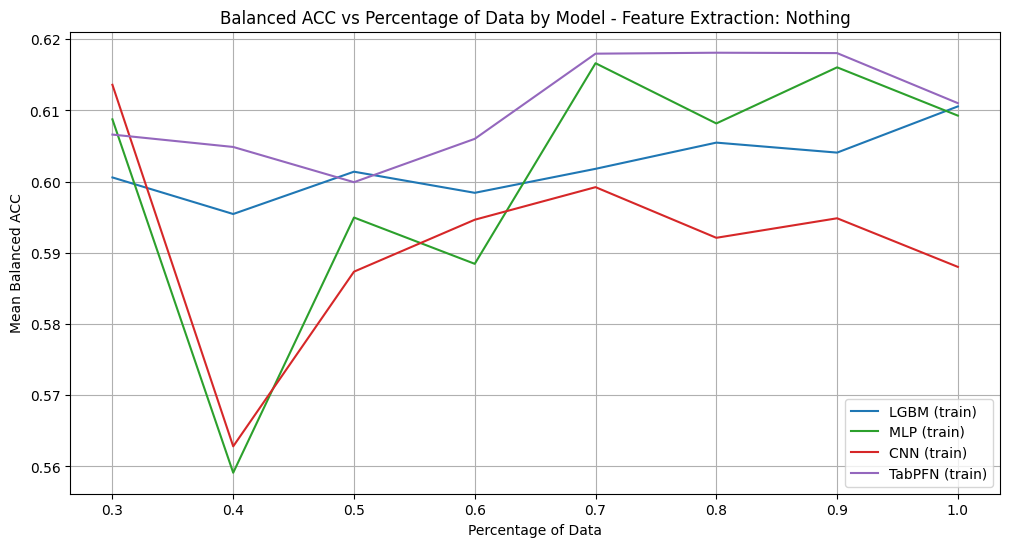

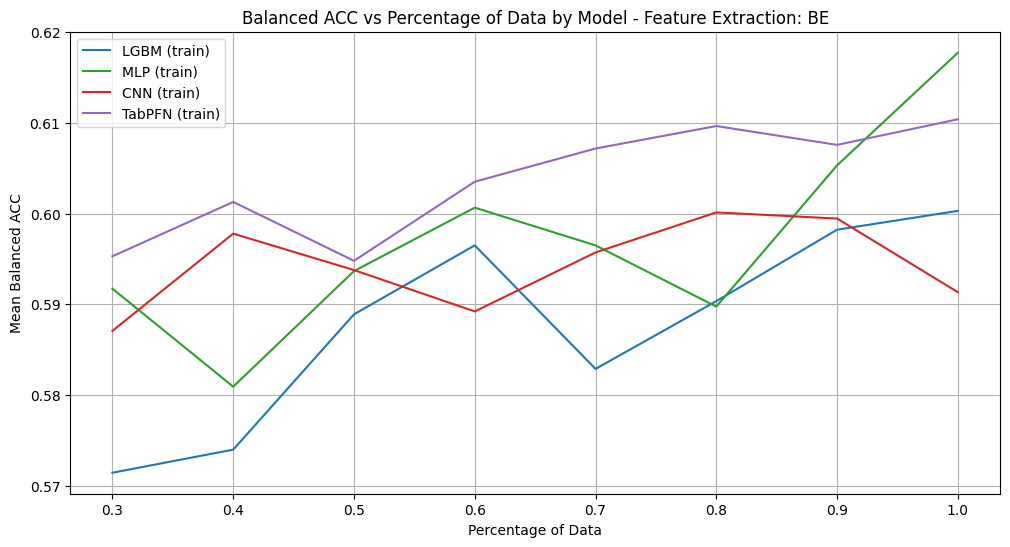

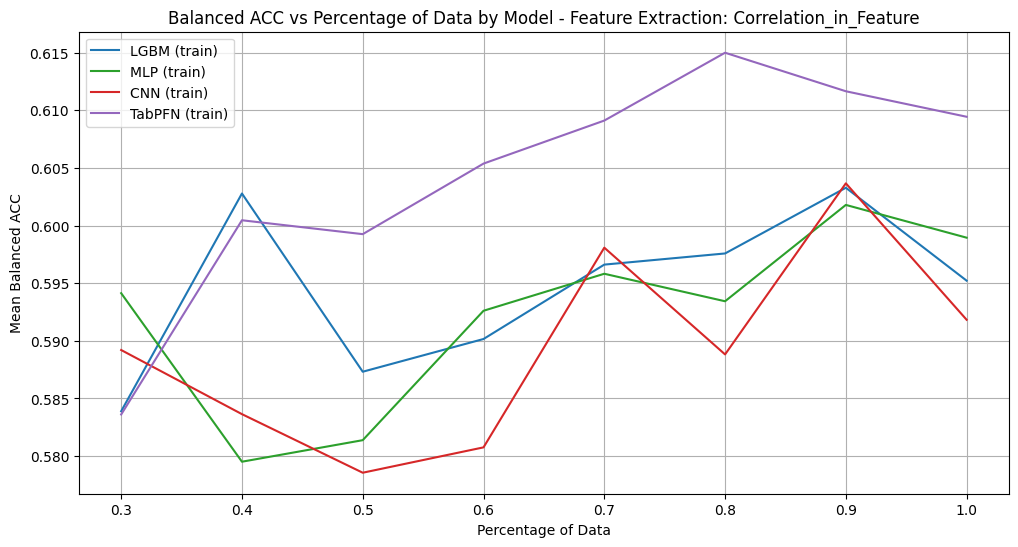

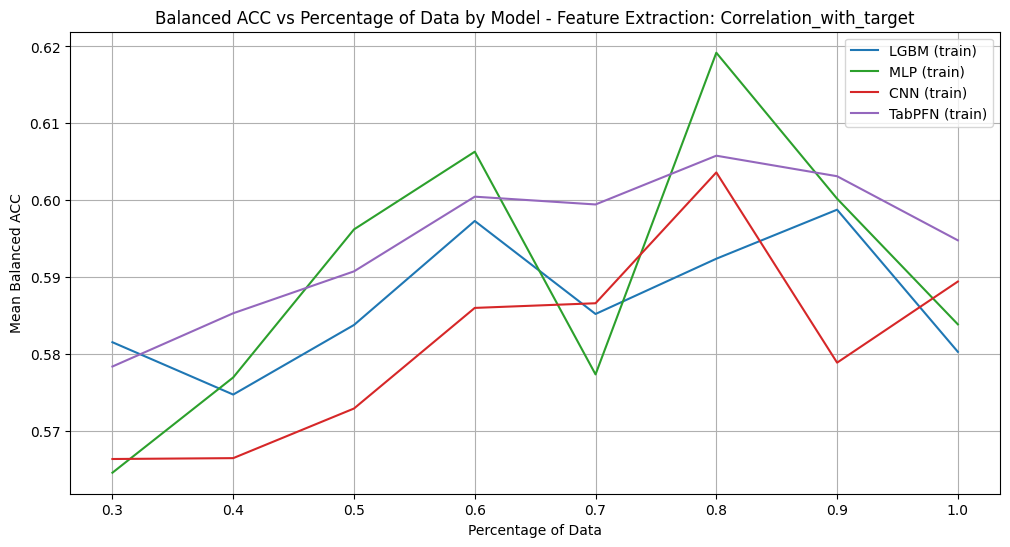

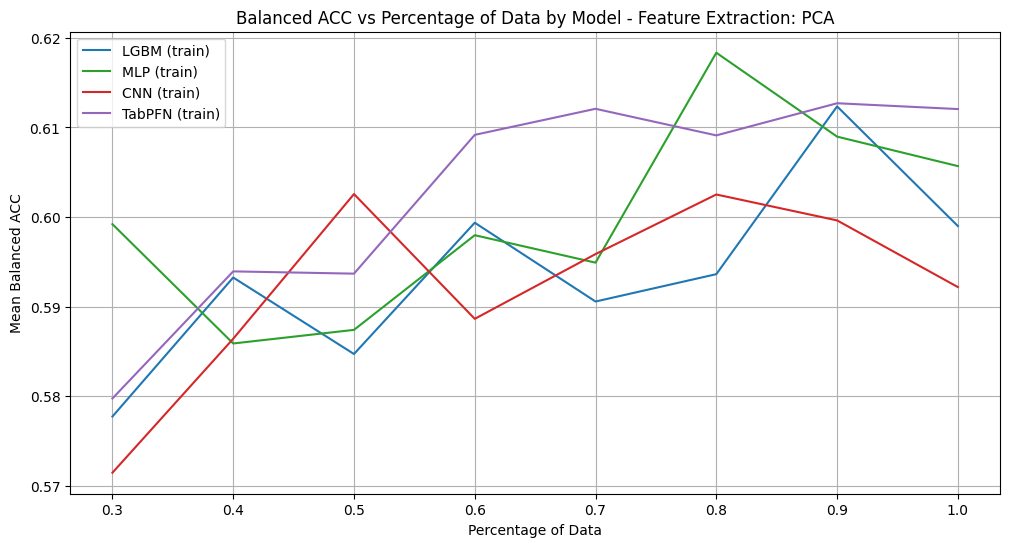

Best model train score: 0.6191799872325803 with search term: 0.8_Correlation_with_target_MLP_train
Best model eval score: 0.6368541905855338 with search term: 0.3_PCA_MLP_eval


In [174]:
plot_metric_by_feature_extraction(df, models, metric='Balanced_ACC', show_eval=False)

In [175]:
path = "./00_results/age_unausgeglichen_10classes/viele_perc/"
csvs_deconfounded = [path + f for f in os.listdir(path) if f.endswith('.csv')]
df = pd.concat([pd.read_csv(file) for file in csvs_deconfounded])

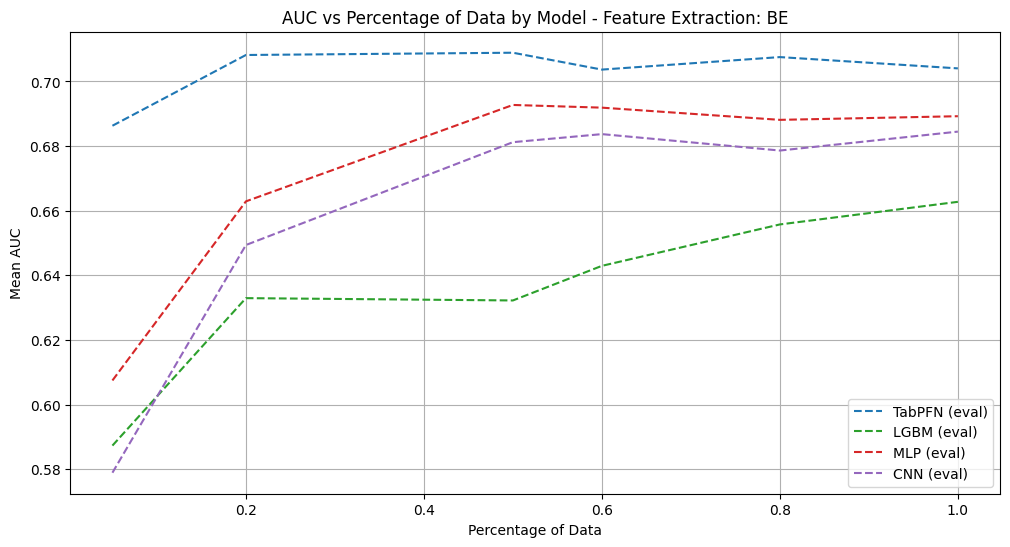

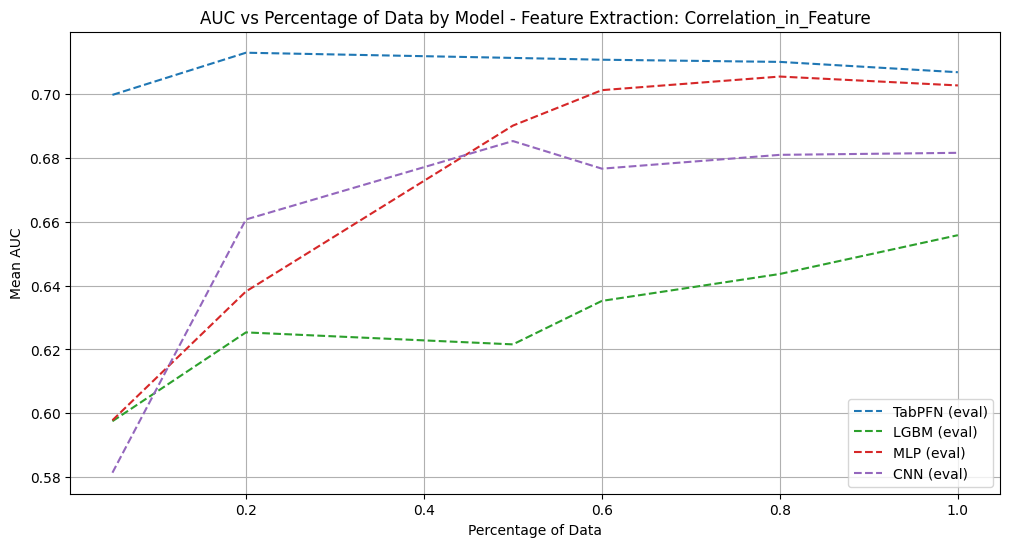

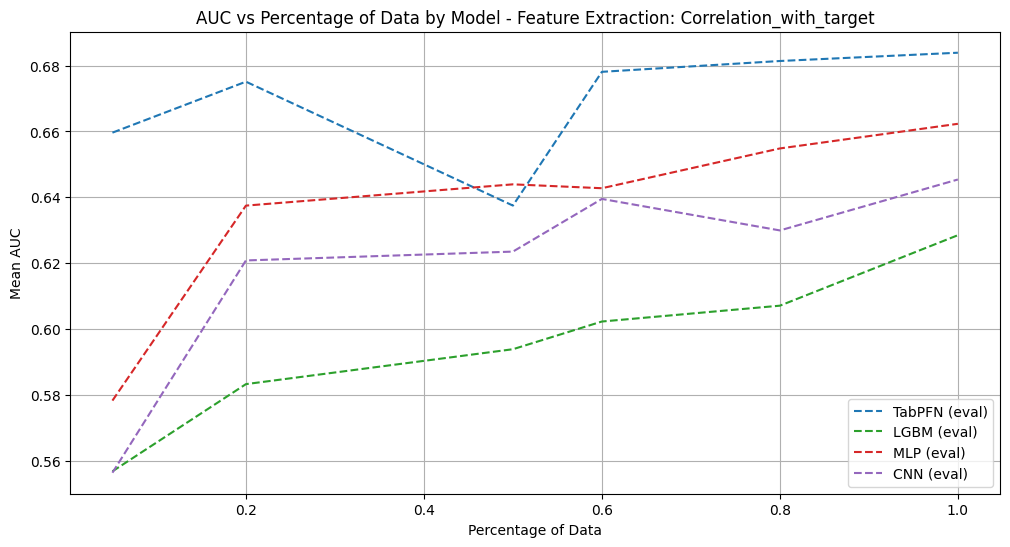

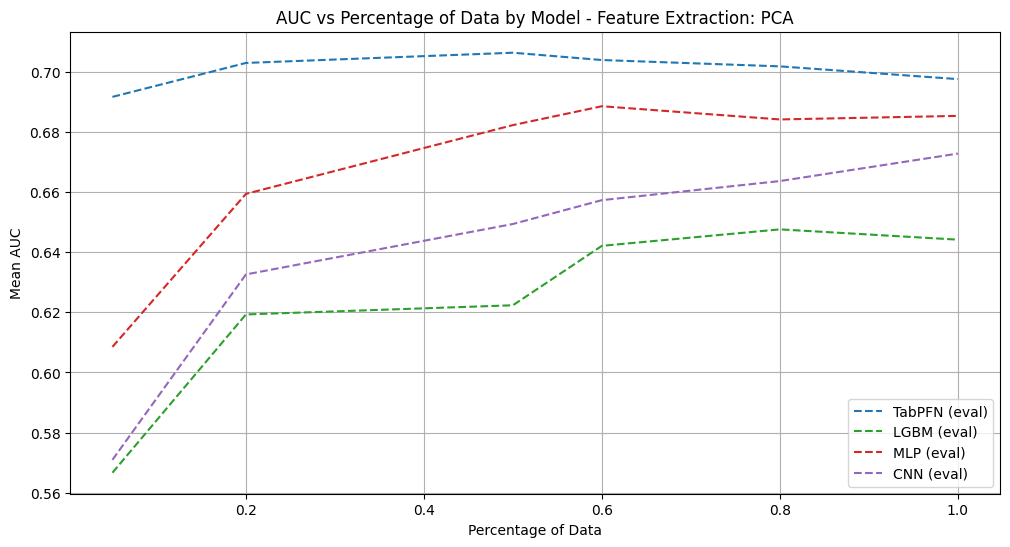

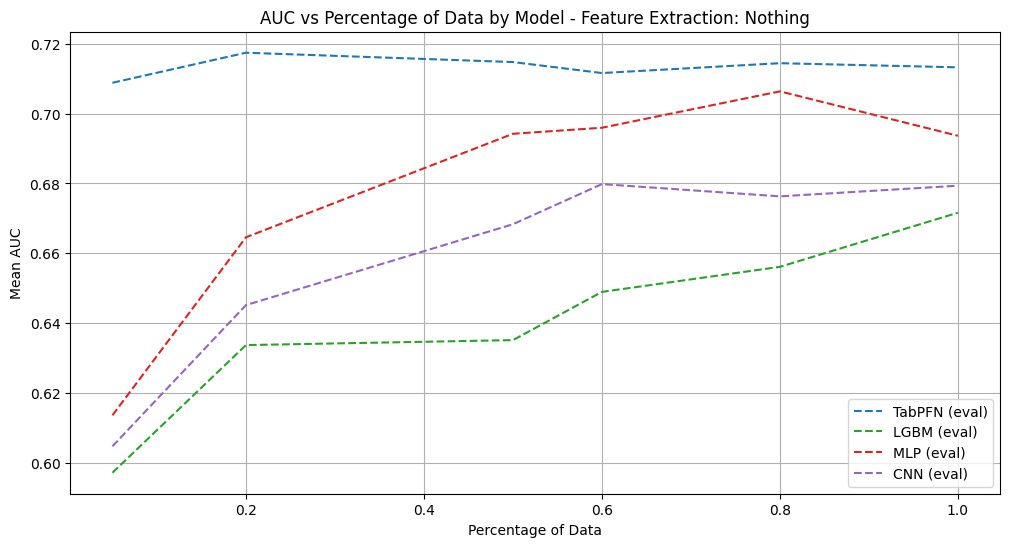

Best model train score: 0.7702430918598575 with search term: 0.6_Nothing_TabPFN_train
Best model eval score: 0.7174720000000001 with search term: 0.2_Nothing_TabPFN_eval


In [176]:
models = df['model_type'].unique()
plot_metric_by_feature_extraction(df, models, metric='AUC', show_train=False)

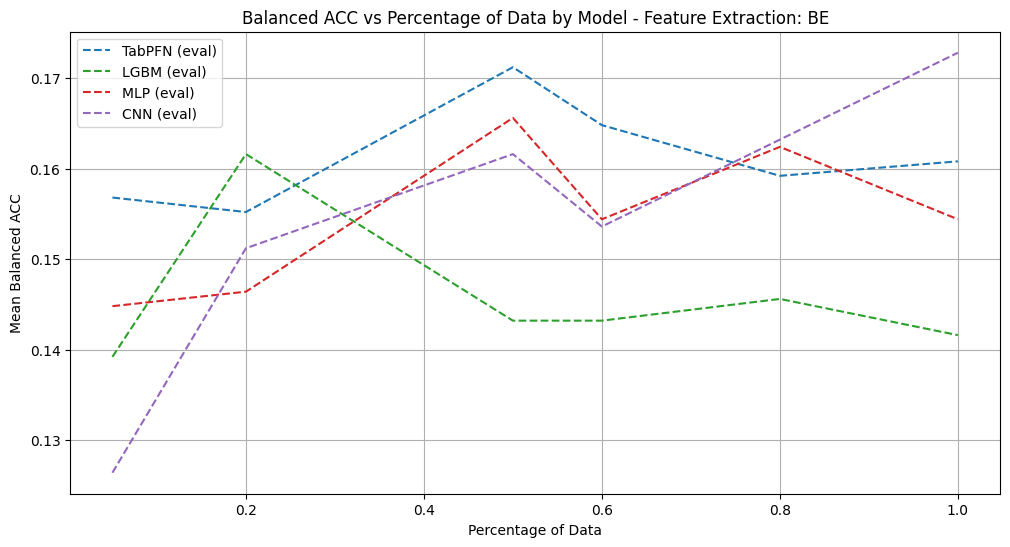

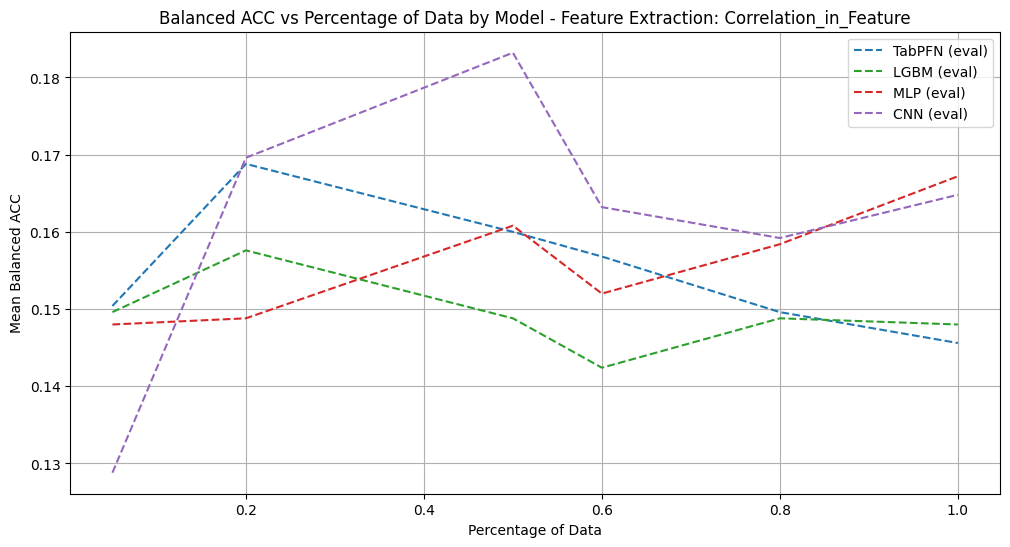

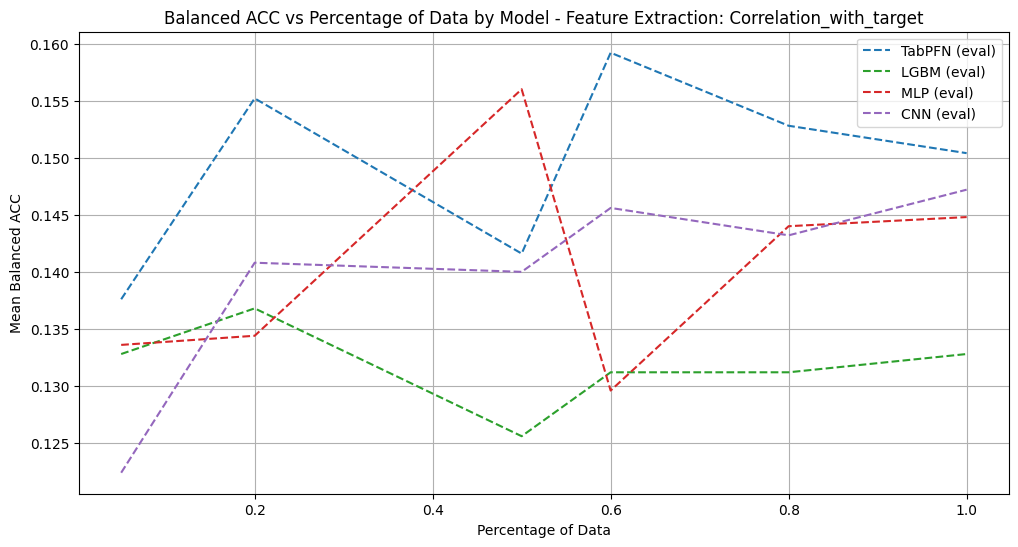

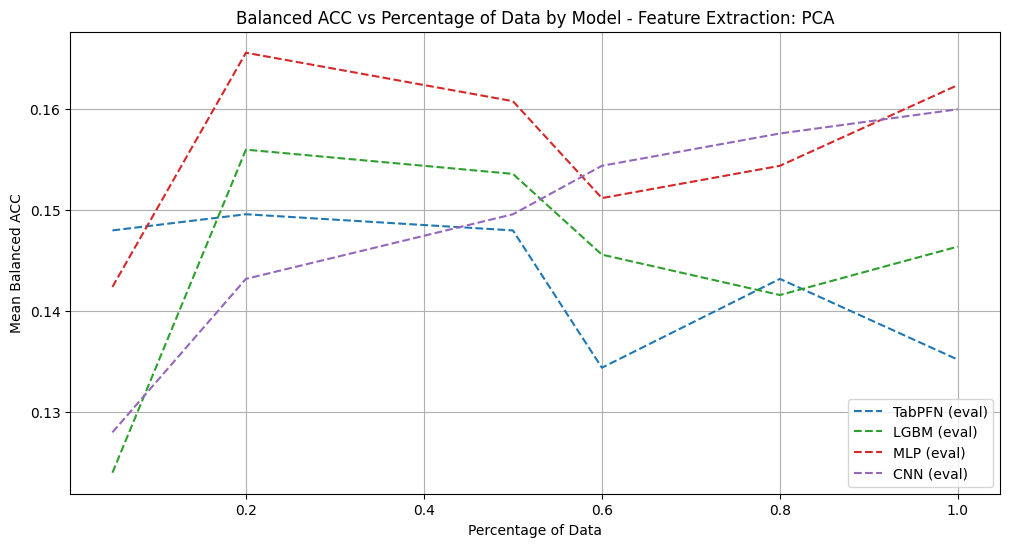

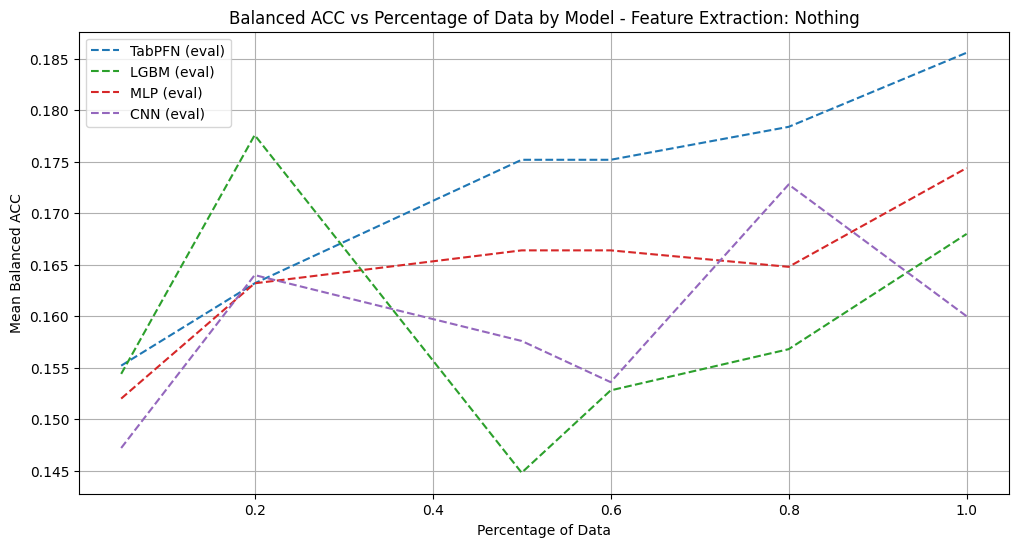

Best model train score: 0.2245937617015253 with search term: 0.8_BE_TabPFN_train
Best model eval score: 0.1856 with search term: 1_Nothing_TabPFN_eval


In [177]:
plot_metric_by_feature_extraction(df, models, metric='Balanced_ACC', show_train=False)